# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([ 1.97516474, -1.50623058,  1.69832362,  0.92091778,  1.380465  ,
        0.13744396,  1.80848639,  0.51426604,  1.35120548,  0.03794007,
        1.0896319 , -1.75174595,  0.36513252, -1.10496147, -0.5780094 ,
        0.51953752,  0.12544483, -0.6137549 , -0.64670983,  0.51121436,
       -0.81267373,  0.35724956,  1.08574193,  1.5898958 , -0.63918494,
       -0.6870261 , -1.20812082,  0.55730895,  0.13947877, -0.20428617,
        2.8356683 ,  0.97246713,  0.42102156,  1.83690607,  1.1425363 ,
       -1.18357697, -0.99021957, -0.48855778,  1.08334815, -0.54187378,
        2.41879429, -1.56547793, -0.89372697,  0.38585739,  1.12139359,
       -1.36760715,  0.49133997,  0.53965827,  1.32266676,  0.10057922,
       -0.01340304,  2.27852011,  1.43443727,  0.42941324,  0.68982325,
       -0.08196012, -0.56851886, -0.47988657, -0.4694815 , -0.62626872,
       -0.98402808,  0.30563308, -1.72290002,  2.37884786,  0.02146262,
       -1.4125755 ,  0.11660437, -1.24028998,  0.26928824, -0.57

In [4]:
sample.dtype

dtype('float64')

In [5]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [6]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

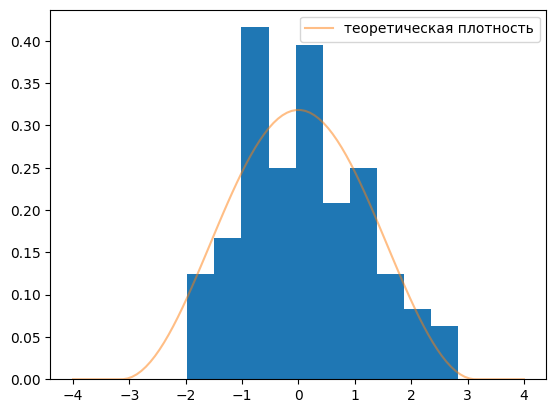

In [7]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [8]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.11416312731650574
1.164841309739415


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

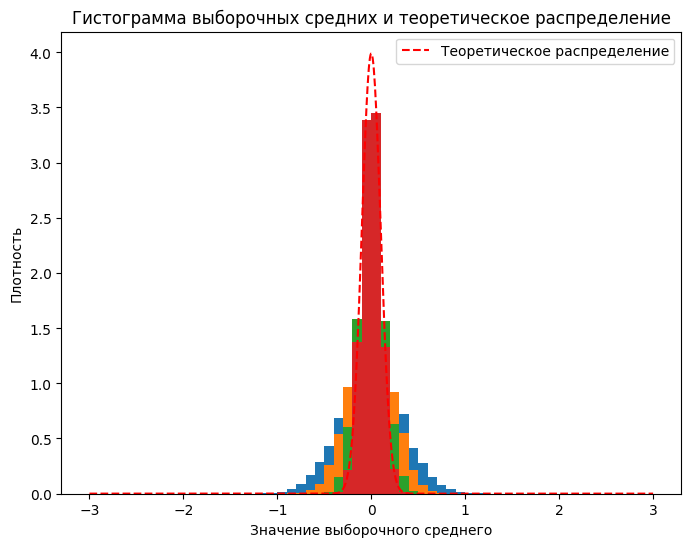

In [9]:
# ваш код тут
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Определим параметры распределения
mu = 0                         # математическое ожидание
sigma = 1                      # стандартное отклонение

# Шаг сетки для гистограммы
step = 0.1

# Объемы выборок для анализа
n_samples = [10, 20, 50, 100]

# Создадим гистограммы для различных объемов выборок
plt.figure(figsize=(8, 6))
for n in n_samples:
    sample_means = []
    for i in range(10000):
        samples = np.random.normal(loc=mu, scale=sigma, size=n)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)
    _, bins, _ = plt.hist(sample_means, bins=np.arange(-3, 3.1, step), density=True)

# Теоретическое распределение выборочных средних по ЦПТ
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, loc=mu, scale=sigma/np.sqrt(n_samples[-1]))
plt.plot(x, y, 'r--', label='Теоретическое распределение')

plt.title('Гистограмма выборочных средних и теоретическое распределение')
plt.xlabel('Значение выборочного среднего')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
#Апроксимация распределения выборочного среднего согласно центральной предельной теореме (ЦПТ) работает очень хорошо 
# для широкого спектра распределений генеральной совокупности, включая те, которые используются в данном примере.
#Пример, представленный выше, демонстрирует, как гистограммы выборочных средних становятся более похожими на нормальное распределение при увеличении объема выборки. Это говорит о том, 
# что апроксимация по ЦПТ работает достаточно хорошо даже для относительно небольших выборок.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import _zconfint_generic

In [23]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [26]:
# Проверка наличия колонки Churn
if 'churn' in df.columns:
    print("Колонка 'Churn' присутствует.")
else:
    print("Колонка 'Churn' отсутствует.")

Колонка 'Churn' присутствует.


In [41]:
# Проверка наличия значений 'Yes' и 'No' в колонке 'Churn'
if df['churn'].isin(['Yes', 'No']).any():
    yes_no_rows = df[df['churn'].isin(['Yes', 'No'])]
    print("Найдены строки с 'Yes' и 'No' в колонке 'churn'.")
else:
    print("Колонка 'churn' содержит другие значения, кроме 'Yes' и 'No'.")

# Выделение данных по колонкам churn
churned = yes_no_rows[yes_no_rows["churn"] == 'Yes']
not_churned = yes_no_rows[yes_no_rows["churn"] == 'No']

# Проверка длины массивов
if len(churned) == 0:
    raise ValueError("Массив 'churned' пустой, длина равна 0.")
elif len(not_churned) == 0:
    raise ValueError("Массив 'not_churned' пустой, длина равна 0.")

# Расчёт среднего значения и дисперсии для ушедших клиентов
churned_mean = churned['Total Day Calls'].mean()
churned_variance = churned['Total Day Calls'].var(ddof=1)

# Расчёт среднего значения и дисперсии для оставшихся клиентов
not_churned_mean = not_churned['Total Day Calls'].mean()
not_churned_variance = not_churned['Total Day Calls'].var(ddof=1)

# Формула для z-интервала
z_alpha = 1.96  # Уровень значимости α для 95% доверительного интервала

# Ушедшие клиенты
churned_lower_bound = churned_mean - z_alpha * np.sqrt(churned_variance / len(churned))
churned_upper_bound = churned_mean + z_alpha * np.sqrt(churned_variance / len(churned))

# Оставшиеся клиенты
not_churned_lower_bound = not_churned_mean - z_alpha * np.sqrt(not_churned_variance / len(not_churned))
not_churned_upper_bound = not_churned_mean + z_alpha * np.sqrt(not_churned_variance / len(not_churned))

# Использование функции из statsmodels
_, conf_ints = _zconfint_generic((churned['Total Day Calls'], not_churned['Total Day Calls']), alpha=0.05)

# Сравнение результатов
print("Доверительный интервал для ушедших клиентов: [{:.3f}, {:.3f}]".format(churned_lower_bound, churned_upper_bound))
print("Доверительный интервал для оставшихся клиентов: [{:.3f}, {:.3f}]".format(not_churned_lower_bound, not_churned_upper_bound))
print("Результат с использованием statsmodels: {}".format(conf_ints))

Колонка 'churn' содержит другие значения, кроме 'Yes' и 'No'.


NameError: name 'yes_no_rows' is not defined